In [1]:
! wget https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_global/degree_binarize/CMU_a_0050642_degree_binarize.nii.gz

--2025-03-26 03:26:16--  https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_global/degree_binarize/CMU_a_0050642_degree_binarize.nii.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.165.208, 52.217.84.230, 52.217.13.86, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.165.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222037 (217K) [application/octet-stream]
Saving to: ‘CMU_a_0050642_degree_binarize.nii.gz’

CMU_a_0050642_degre 100%[===================>] 216.83K   400KB/s    in 0.5s    

2025-03-26 03:26:18 (400 KB/s) - ‘CMU_a_0050642_degree_binarize.nii.gz’ saved [222037/222037]



In [2]:
pip install nibabel

In [32]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test_load = nib.load('/content/CMU_a_0050642_degree_binarize.nii.gz').get_fdata()
test_load.shape

(61, 73, 61)

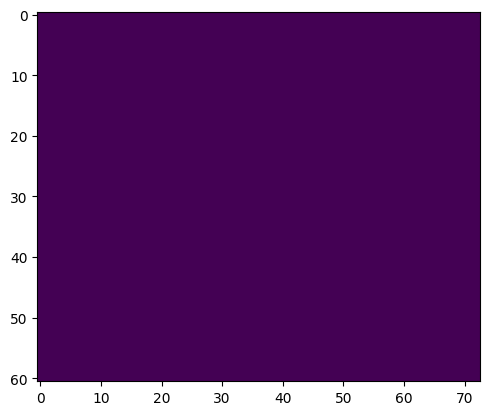

In [5]:
test = test_load[:,:,60]
plt.imshow(test)
plt.show()

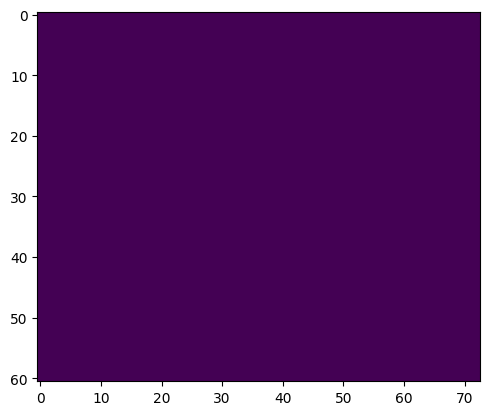

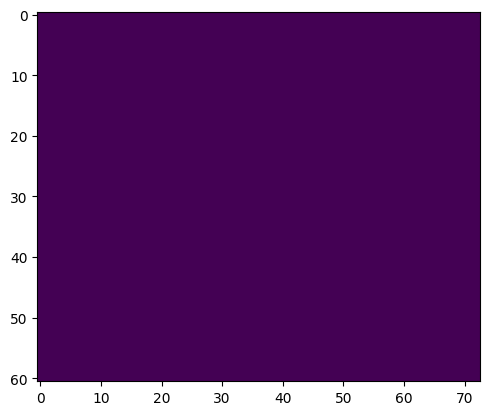

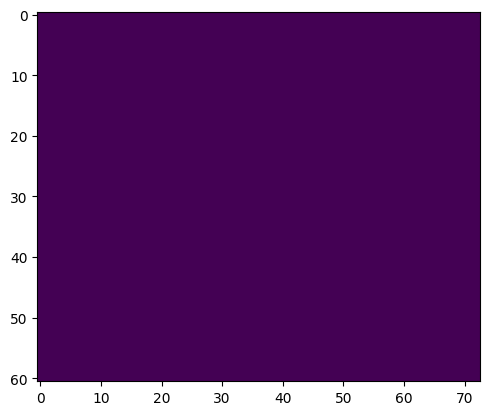

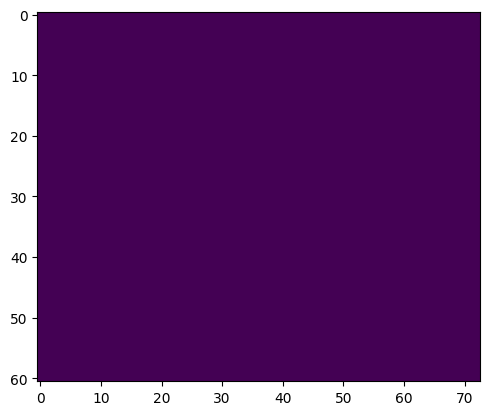

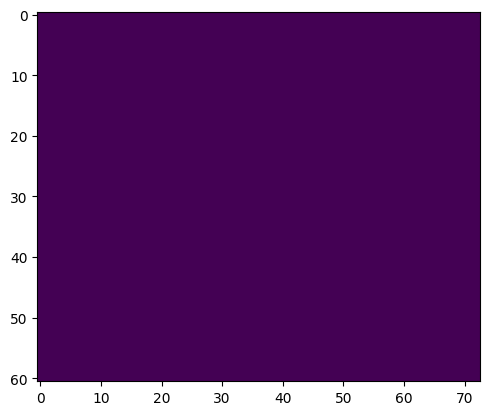

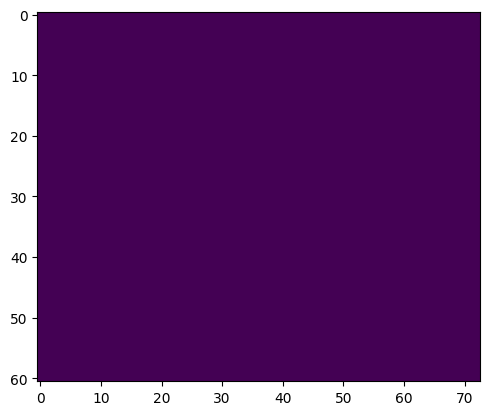

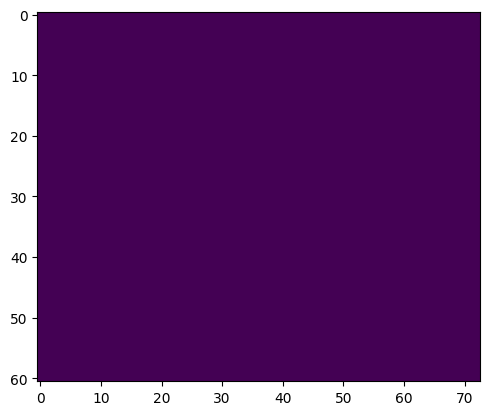

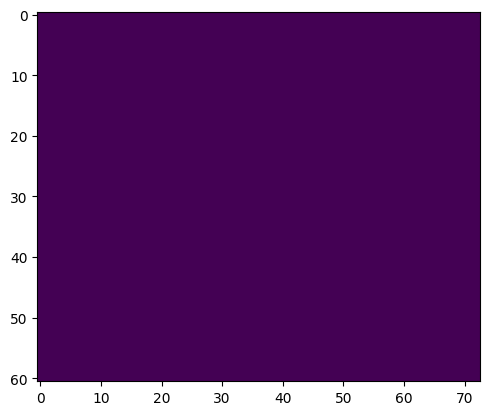

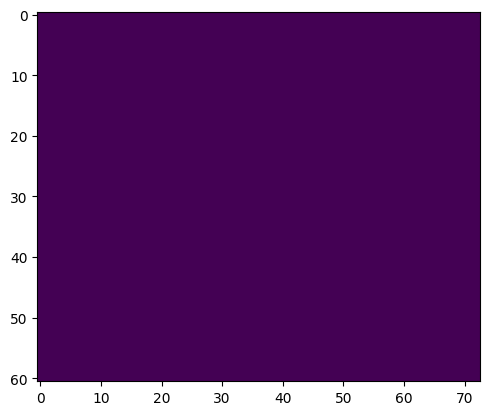

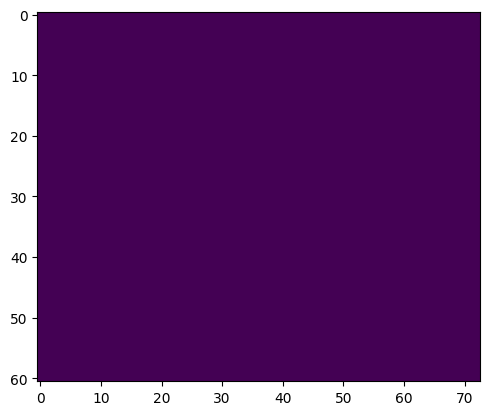

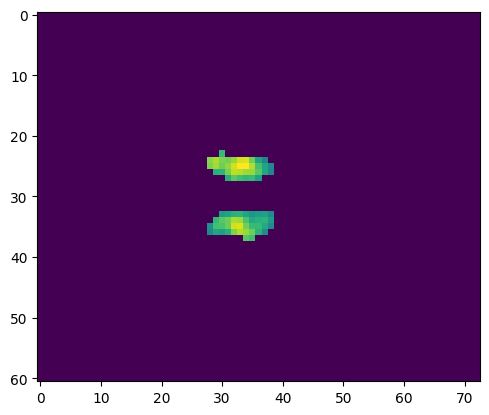

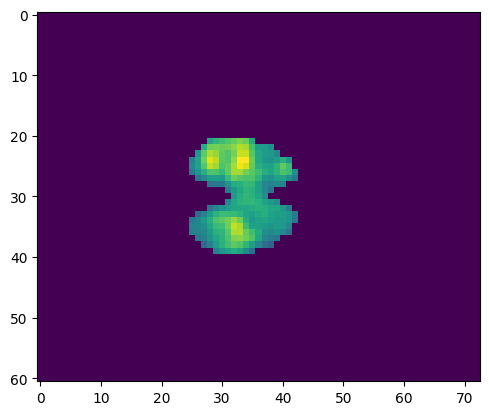

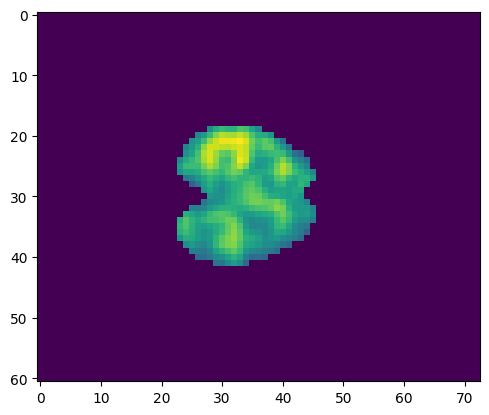

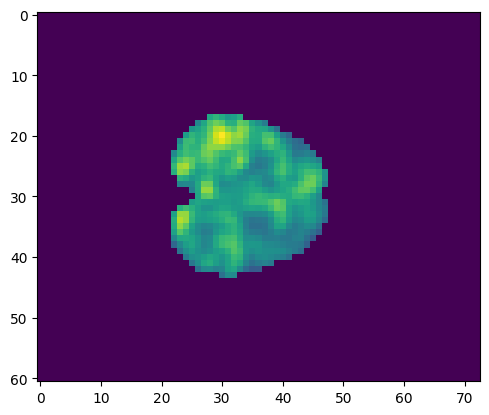

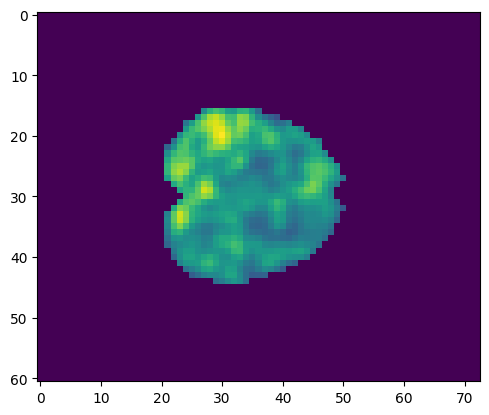

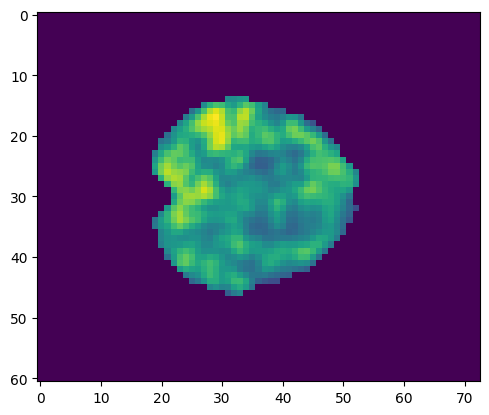

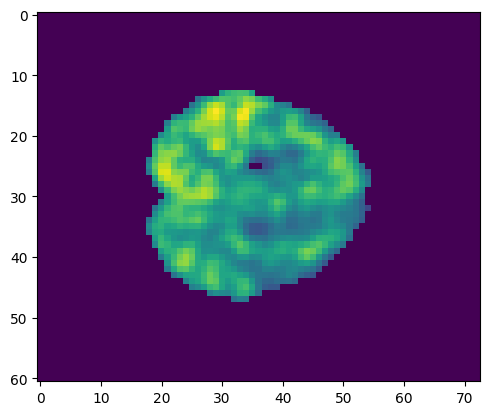

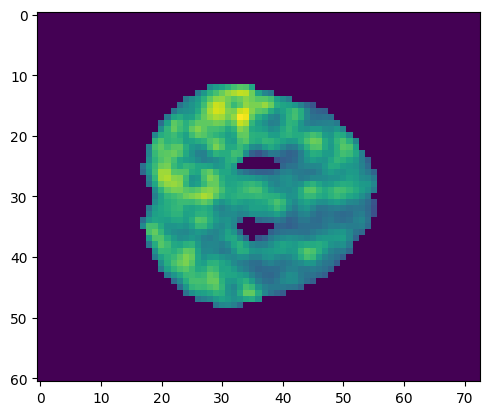

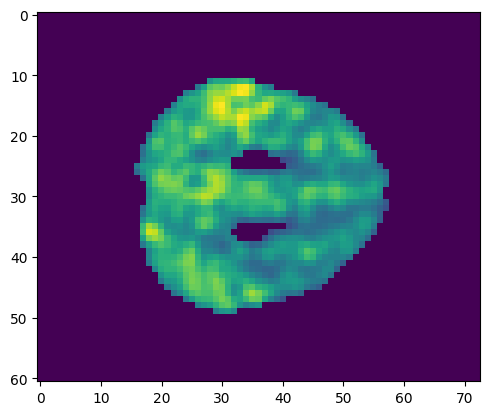

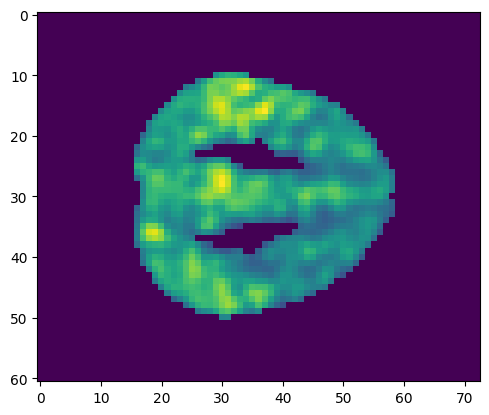

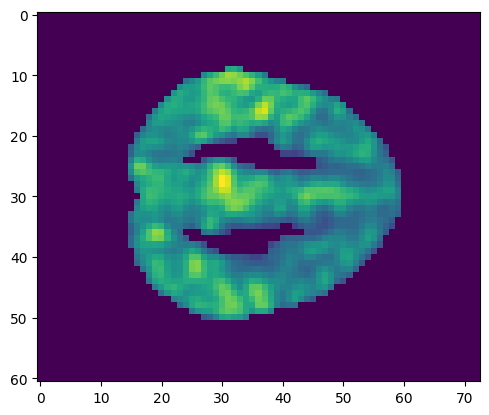

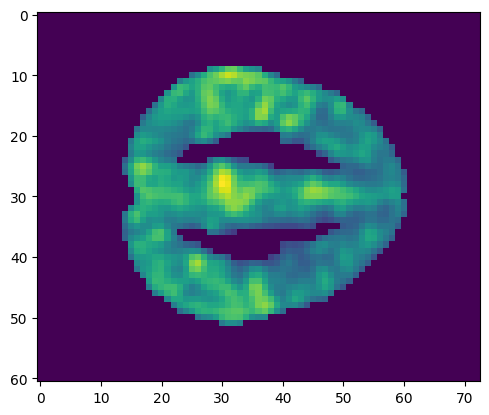

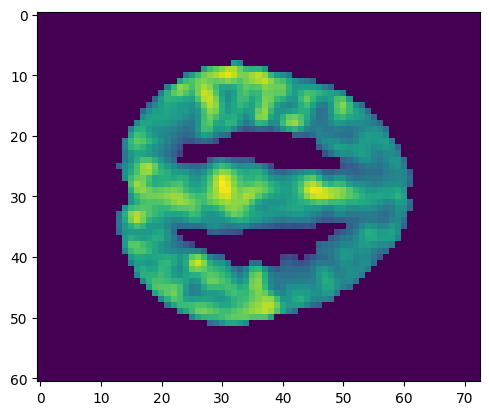

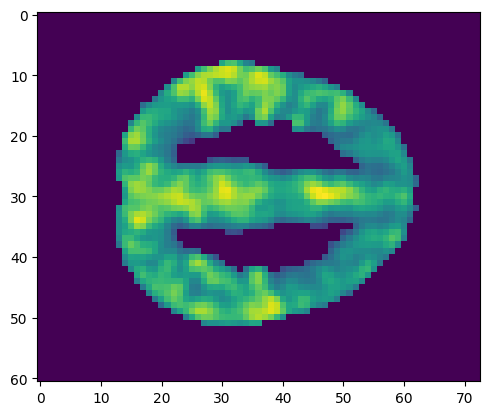

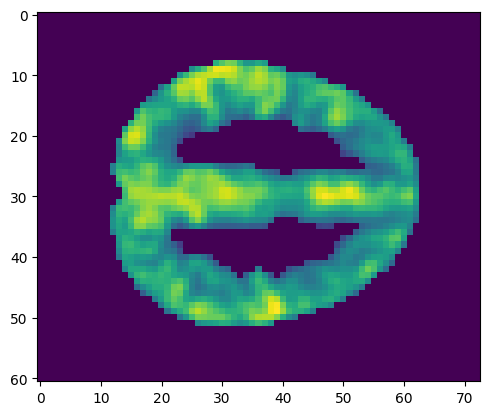

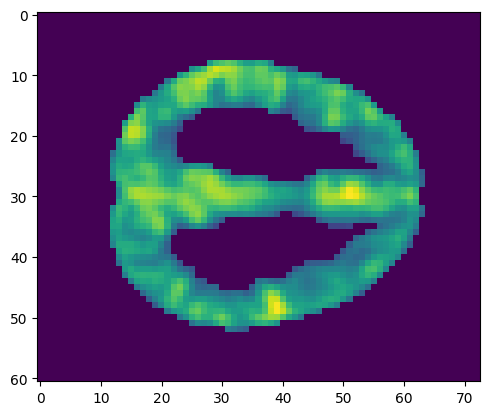

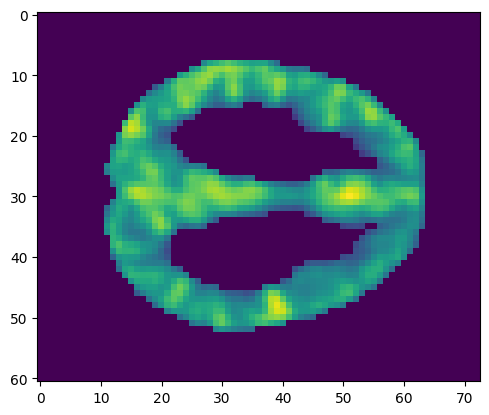

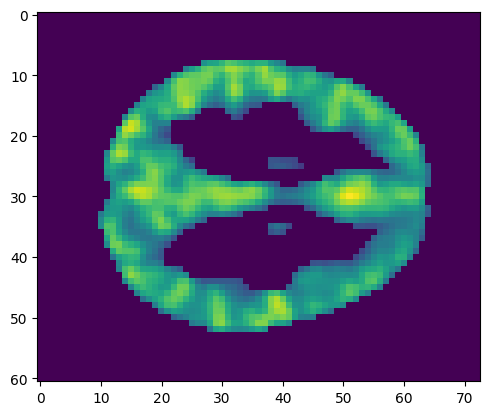

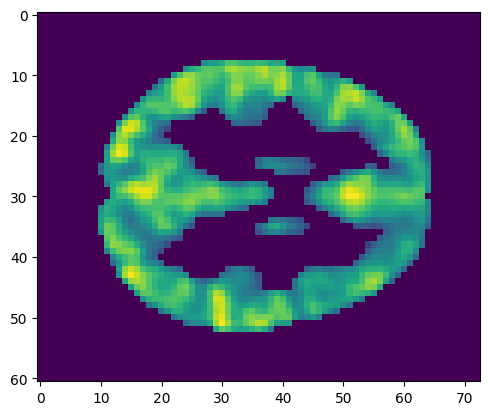

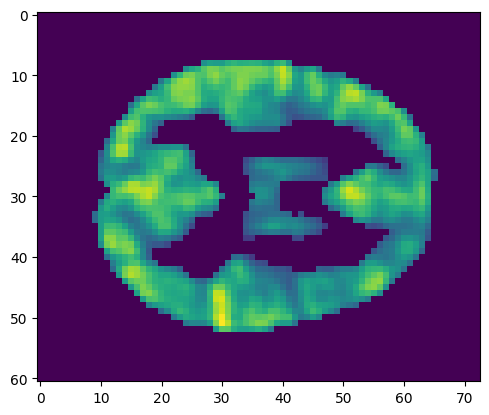

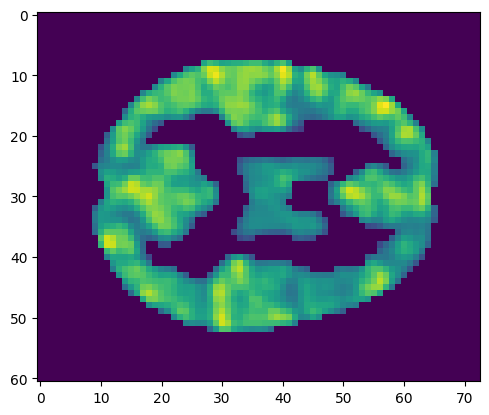

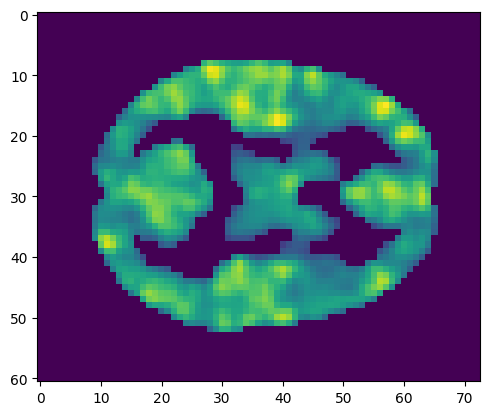

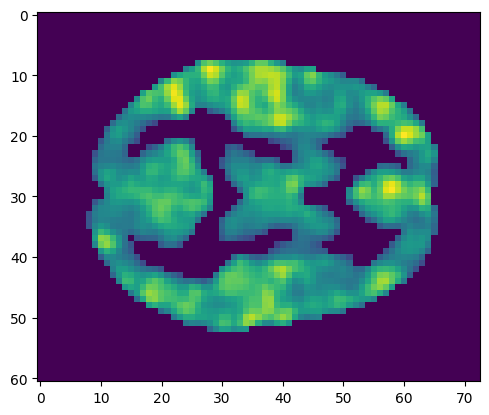

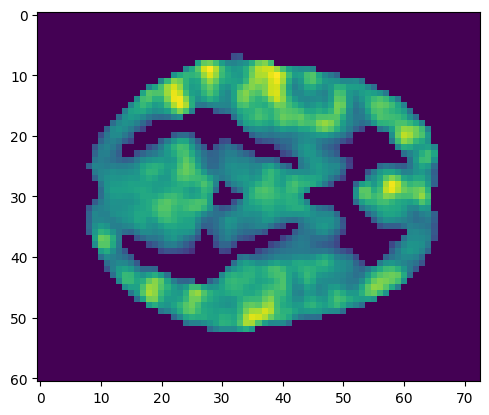

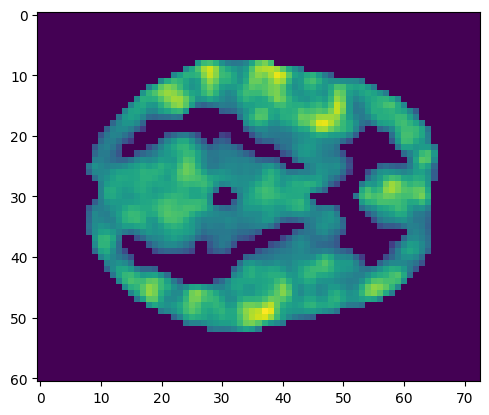

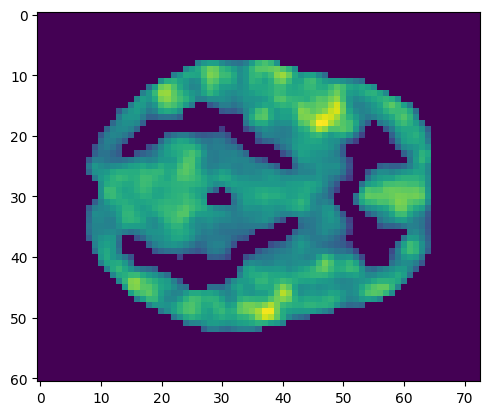

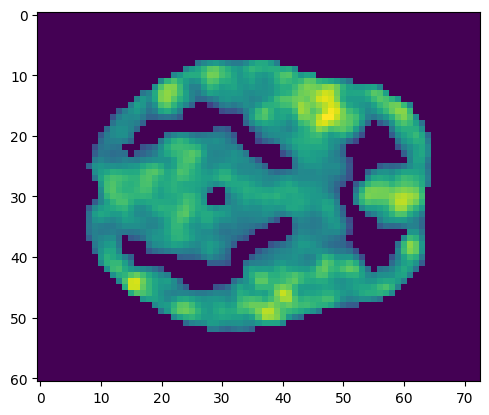

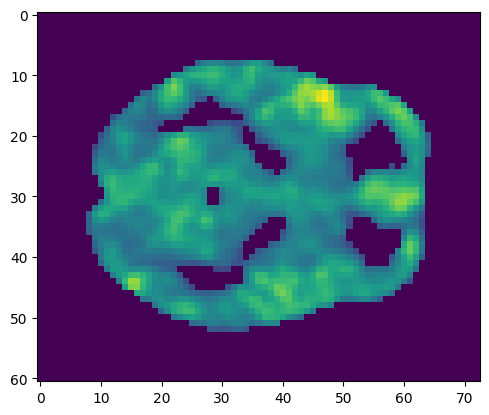

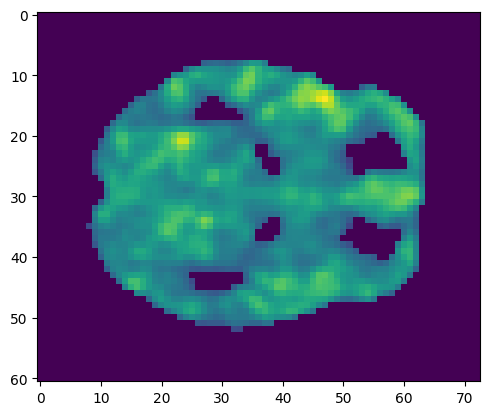

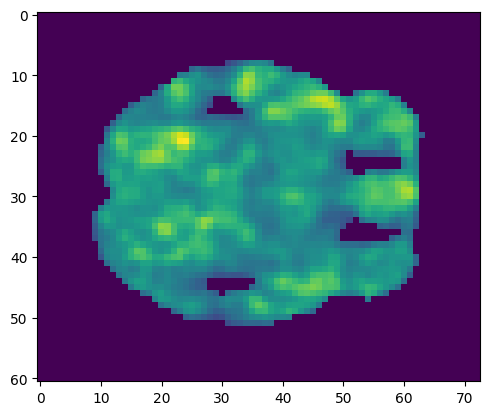

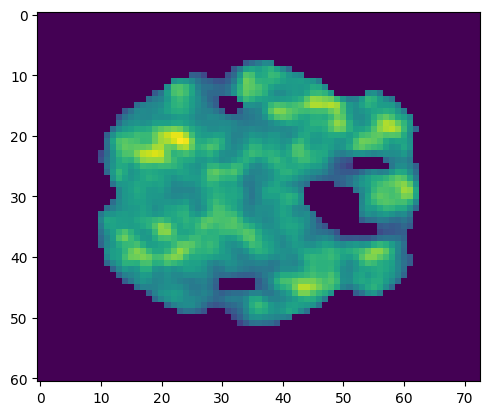

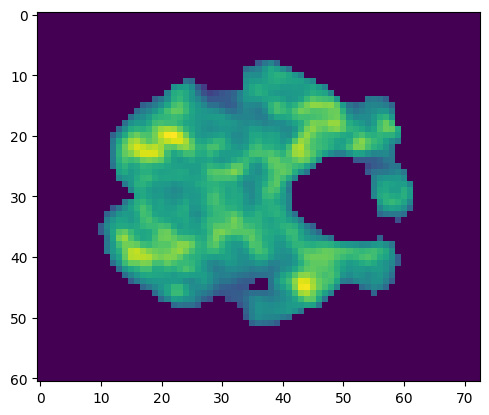

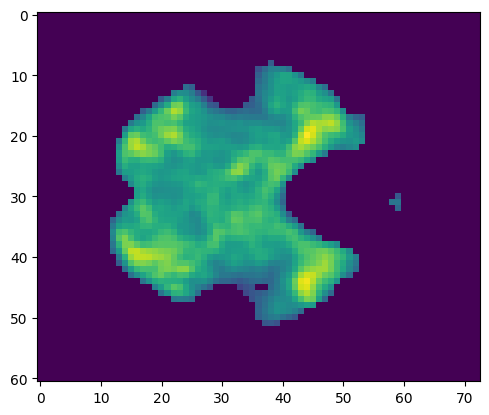

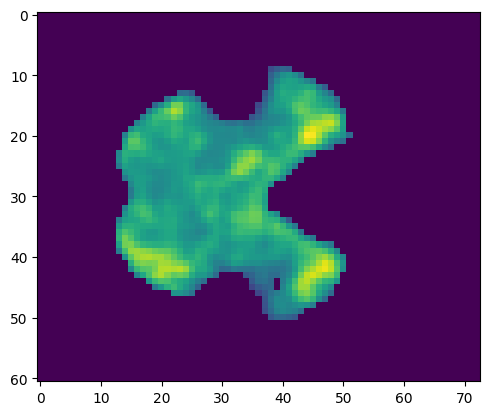

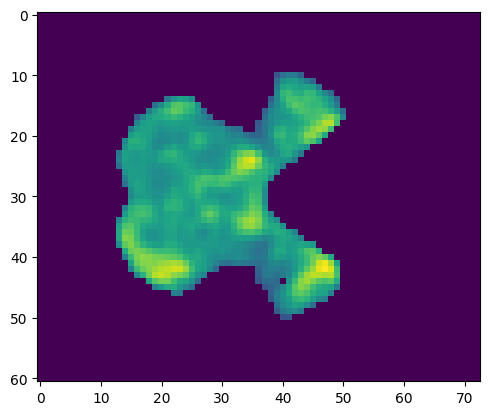

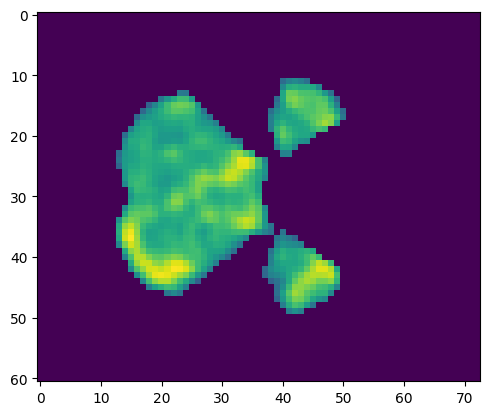

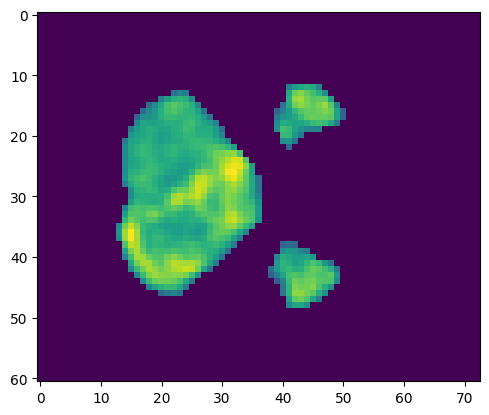

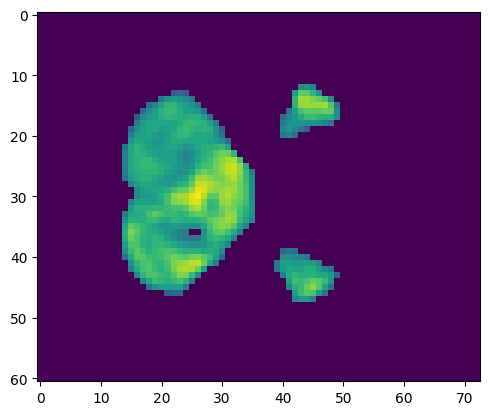

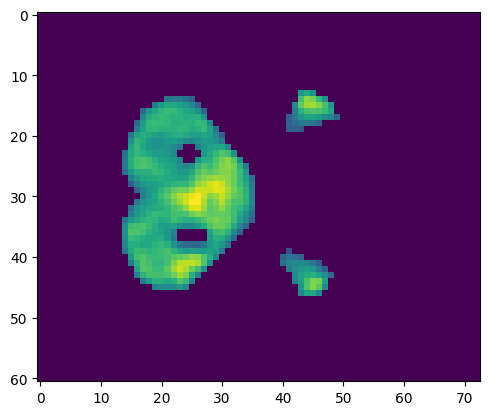

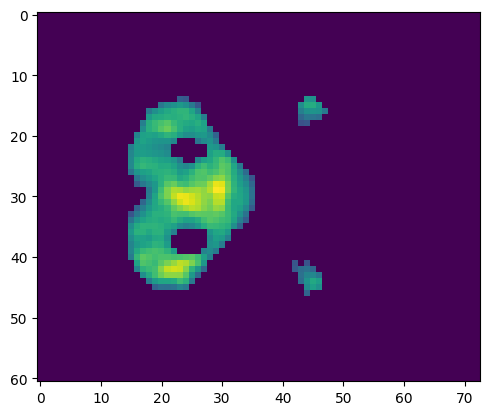

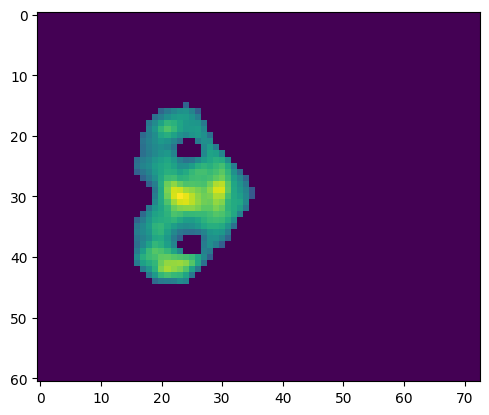

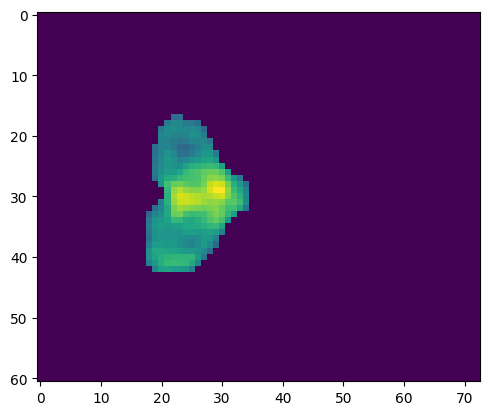

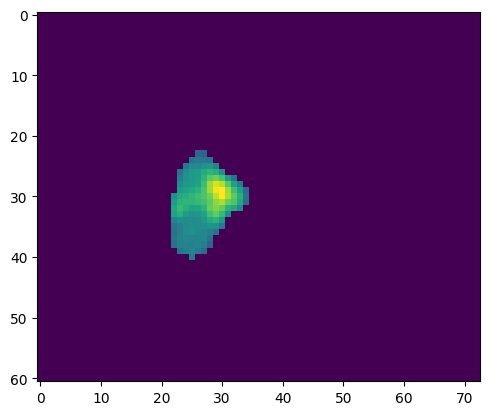

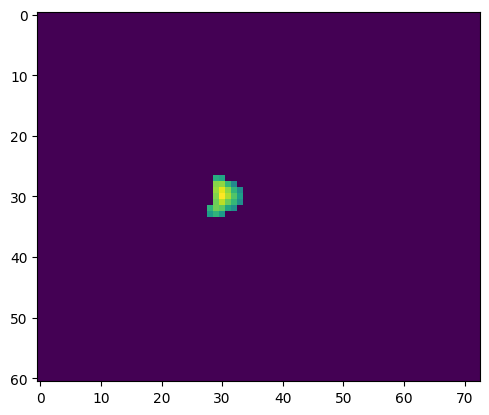

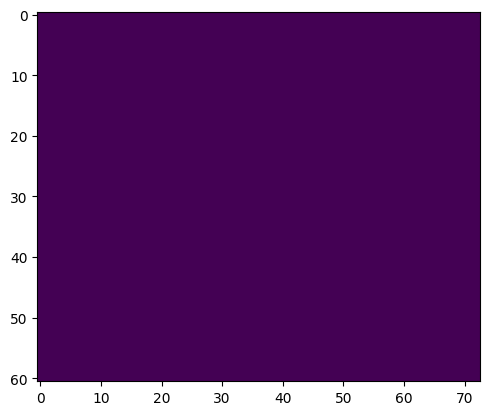

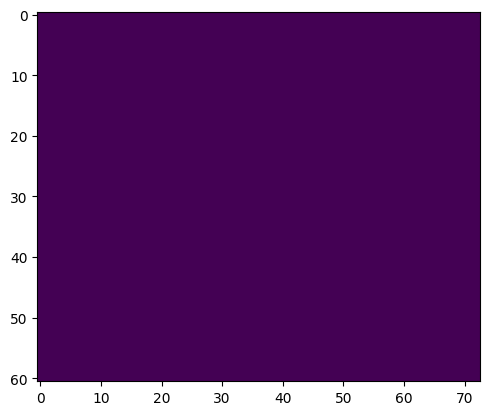

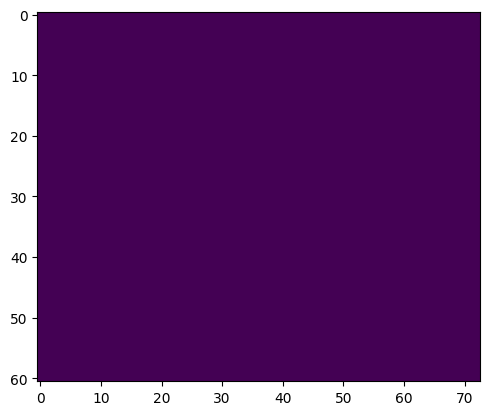

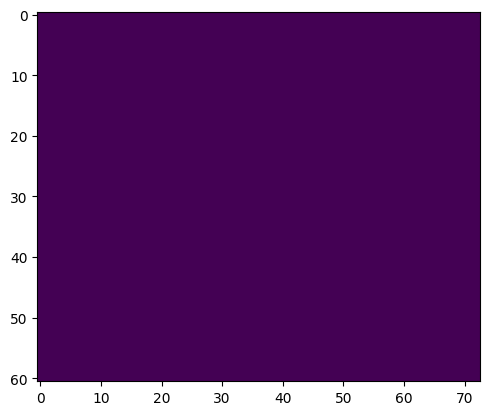

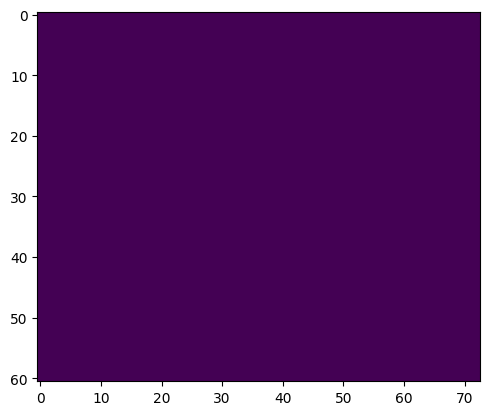

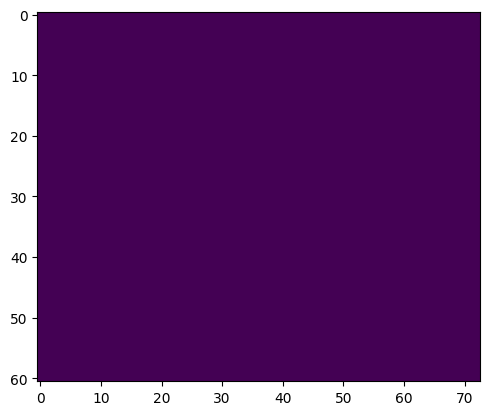

In [6]:
for i in range(60):
  test = test_load[:,:,60-i]
  plt.imshow(test)
  plt.show()

## Now using the params we discussed

In [10]:
! wget https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/rois_aal/CMU_a_0050642_rois_aal.1D

--2025-03-26 03:29:30--  https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/rois_aal/CMU_a_0050642_rois_aal.1D
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.204.240, 52.217.230.24, 3.5.24.30, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.204.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274711 (268K) [application/octet-stream]
Saving to: ‘CMU_a_0050642_rois_aal.1D’

CMU_a_0050642_rois_ 100%[===================>] 268.27K   491KB/s    in 0.5s    

2025-03-26 03:29:31 (491 KB/s) - ‘CMU_a_0050642_rois_aal.1D’ saved [274711/274711]



In [19]:
data = np.loadtxt('/content/CMU_a_0050642_rois_aal.1D')
data.shape

(236, 116)

In [24]:
# this (236, 116) is basically (number of time points, number of brain regions)

In [20]:
with open("/content/CMU_a_0050642_rois_aal.1D", "r") as file:
    lines = file.readlines()

In [21]:
for line in lines:
  print(line)

#2001	#2002	#2101	#2102	#2111	#2112	#2201	#2202	#2211	#2212	#2301	#2302	#2311	#2312	#2321	#2322	#2331	#2332	#2401	#2402	#2501	#2502	#2601	#2602	#2611	#2612	#2701	#2702	#3001	#3002	#4001	#4002	#4011	#4012	#4021	#4022	#4101	#4102	#4111	#4112	#4201	#4202	#5001	#5002	#5011	#5012	#5021	#5022	#5101	#5102	#5201	#5202	#5301	#5302	#5401	#5402	#6001	#6002	#6101	#6102	#6201	#6202	#6211	#6212	#6221	#6222	#6301	#6302	#6401	#6402	#7001	#7002	#7011	#7012	#7021	#7022	#7101	#7102	#8101	#8102	#8111	#8112	#8121	#8122	#8201	#8202	#8211	#8212	#8301	#8302	#9001	#9002	#9011	#9012	#9021	#9022	#9031	#9032	#9041	#9042	#9051	#9052	#9061	#9062	#9071	#9072	#9081	#9082	#9100	#9110	#9120	#9130	#9140	#9150	#9160	#9170

2.367207	1.766918	4.395081	4.620261	2.825366	-8.033901	4.394231	-1.938221	11.472295	11.738118	1.089333	-15.930746	4.730103	-19.867769	4.246771	-32.586875	9.006302	-8.604461	22.029825	-2.598087	-9.83914	-42.651447	14.234481	18.29109	2.722504	-23.052961	-1.714723	-8.956481	2.542775	-18.539693	-1.93359	-1

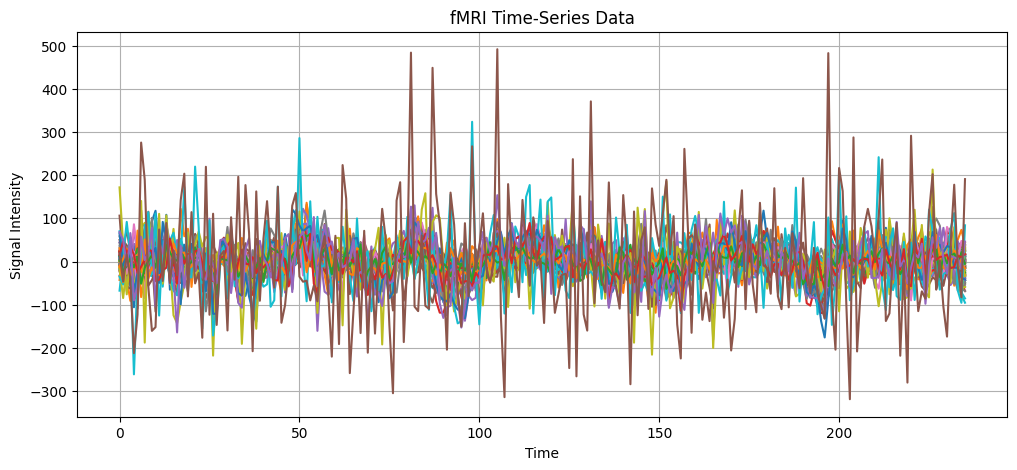

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Signal Intensity")
plt.title("fMRI Time-Series Data")
plt.grid(True)
plt.show()

In [25]:
# Different colors for different intensities over time

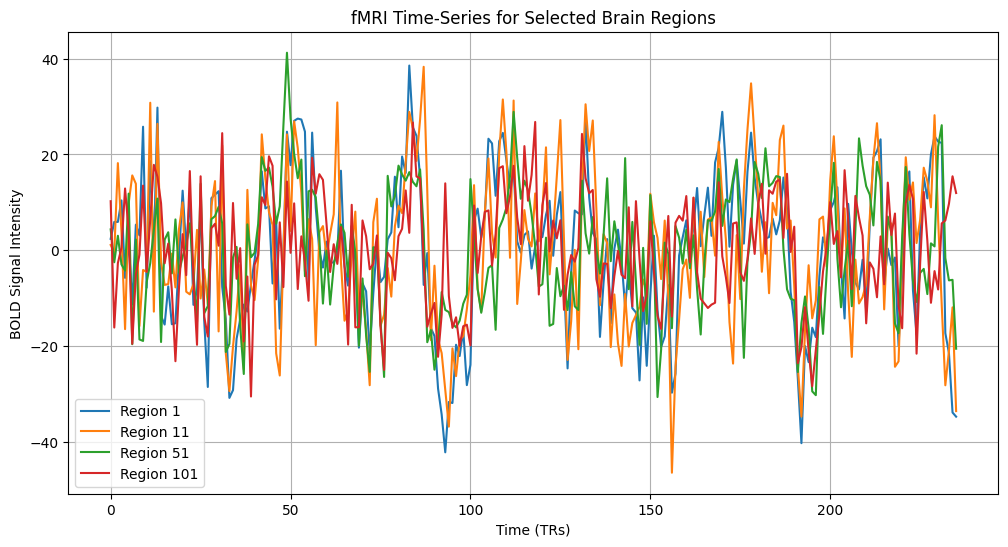

In [29]:
# gpt said use a BOLD intensity thing to see the regions separately

# Select a few random regions to visualize
selected_regions = [0, 10, 50, 100]  # Change these indices if needed

plt.figure(figsize=(12, 6))
for region in selected_regions:
    plt.plot(data[:, region], label=f"Region {region+1}")

plt.xlabel("Time (TRs)")
plt.ylabel("BOLD Signal Intensity")
plt.title("fMRI Time-Series for Selected Brain Regions")
plt.legend()
plt.grid(True)
plt.show()

# so yay we basically got the spikes for random regions

In [30]:
# now we're supposed to get a correlation matrix to understand hyperconnectivity

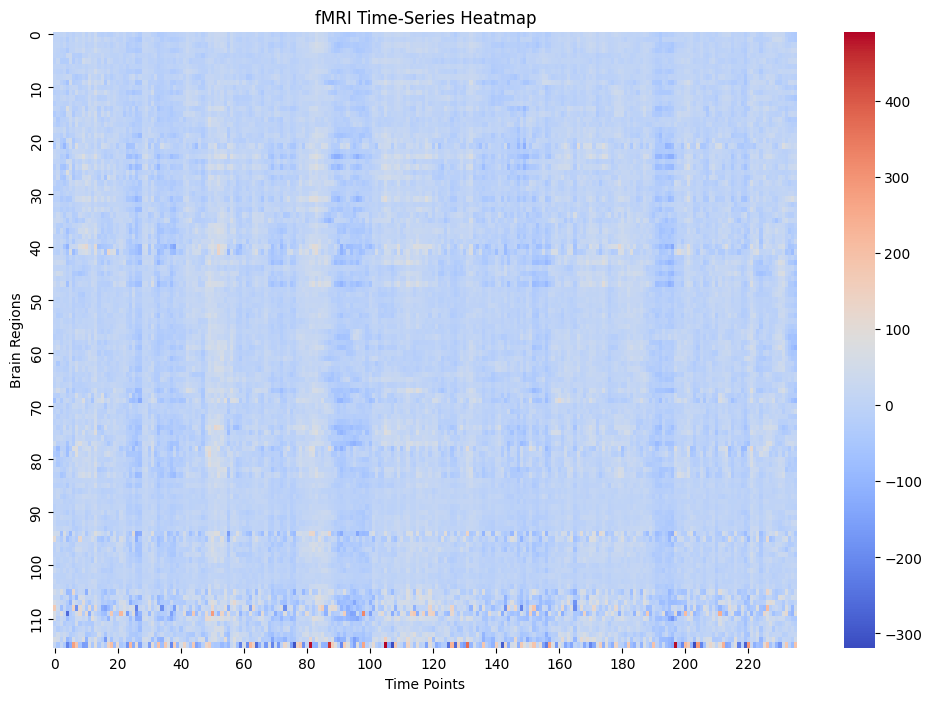

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.T, cmap="coolwarm", cbar=True, xticklabels=20, yticklabels=10)
plt.xlabel("Time Points")
plt.ylabel("Brain Regions")
plt.title("fMRI Time-Series Heatmap")
plt.show()

# Rows = Brain regions (116)
# Columns = Time points (236)
# and the color will just be the signal intensity

# this one is showing us how one brain activity changes over time
# this is just a full plot of the data istself
# instead of plain numbers, we're just putting it in a heatmap

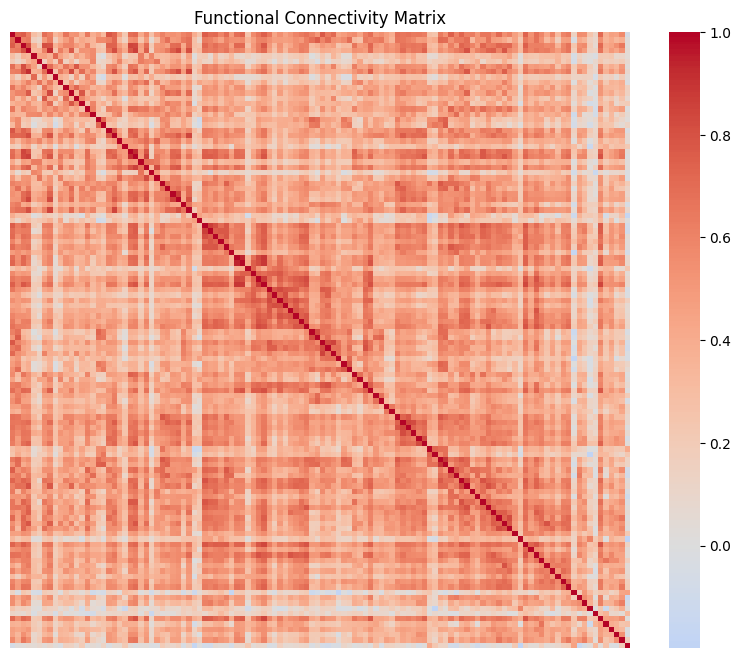

In [35]:
# okay so that didn't give us anything
# let's see the functional connectivity matrix
# this will tell us how activity in different regions correlates to others

corr_matrix = np.corrcoef(data.T)  # Transpose so regions are along the correct axis
# cuz rn we have brain region, time
# corrcoeff basically uses pearsons correlation coefficient (return Pearson product-moment correlation coefficients.)
# https://numpy.org/doc/2.2/reference/generated/numpy.corrcoef.html

# Plot the connectivity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
plt.title("Functional Connectivity Matrix")
plt.show()
